In [86]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [87]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [88]:
!pip install -- upgrade nltk

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.preprocessing import *
from sklearn.model_selection import *
import nltk
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#for vector

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud import WordCloud,ImageColorGenerator



from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jnirm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
df = pd.read_csv("hate speech detection.csv")
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [122]:
df_df =pd.DataFrame(df["tweet"],df["class"])

In [123]:
df_df

,tweet
class,
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
...,...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [124]:
df_df.isnull().sum()

tweet    0
dtype: int64

In [125]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [95]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [126]:
from textblob import TextBlob

In [127]:
for i in df.tweet:
    print(i)

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"
!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"
!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
" &amp; you might not get ya bitch back &amp; thats that "
" @rhythmixx_ :hobbies inclu

In [155]:
tweet_li = []

for i in df.tweet:
    tweet = i.lower()
    tweet_li.append(tweet)
tweet_li

["!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
 '!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
 '!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit',
 '!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny',
 '!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;',
 '!!!!!!!!!!!!!!!!!!"@t_madison_x: the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"',
 '!!!!!!"@__brighterdays: i can not just sit up and hate on another bitch .. i got too much shit going on!"',
 "!!!!&#8220;@selfiequeenbri: cause i'm tired of you big bitches coming for us skinny girls!!&#8221;",
 '" &amp; you might not get ya bitch back &amp; thats t

In [186]:
stop_words = stopwords.words("english")

In [184]:
tweets = df["tweet"]

In [187]:
def clean_tweet(tweet):
    # Remove RT (Retweet)
    tweet = re.sub(r'\brt\b', '', tweet, flags=re.IGNORECASE)
    
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Remove mentions (e.g., @username)
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove special characters and numbers, keep only letters
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    
    return tweet

cleaned_tweets = tweets.apply(clean_tweet)

In [199]:
cleaned_tweets

0        woman shouldnt complain cleaning house amp man...
1        boy dats coldtyga dwn bad cuffin dat hoe st place
2             dawg ever fuck bitch start cry confused shit
3                                         look like tranny
4           shit hear might true might faker bitch told ya
                               ...                        
24778    yous muthafin lie right tl trash mine bible sc...
24779    youve gone broke wrong heart baby drove rednec...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                    youu got wild bitches tellin lies
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object

In [190]:
labels = list(df["class"])

In [206]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jnirm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [244]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_tweets, labels, test_size=0.2, random_state=42)


In [225]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [226]:
from tensorflow import keras

In [245]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()


tokenizer.fit_on_texts(X_train)


X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


vocab_size = len(tokenizer.word_index) + 1


from keras.preprocessing.sequence import pad_sequences


max_length = max(len(seq) for seq in X_train)


for x in X_test:
    if len(x) > max_length:
        print(f"An outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [246]:
def model_evaluate(model,X_test):
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    cf_matrix = confusion_matrix(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)

    cm_df = pd.DataFrame(cm,
                     index = ['hate speech','offensive language','Neutral'], 
                     columns = ['hate speech','offensive language','Neutral'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, cmap="Oranges",linecolor="gray")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [247]:
lr_model = LogisticRegression(C = 1, max_iter = 1000, penalty = 'l2', n_jobs=-1)
lr_model.fit(X_train  ,Y_train)

LogisticRegression(C=1, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.77      1.00      0.87      3832
           2       0.00      0.00      0.00       835

    accuracy                           0.77      4957
   macro avg       0.26      0.33      0.29      4957
weighted avg       0.60      0.77      0.67      4957



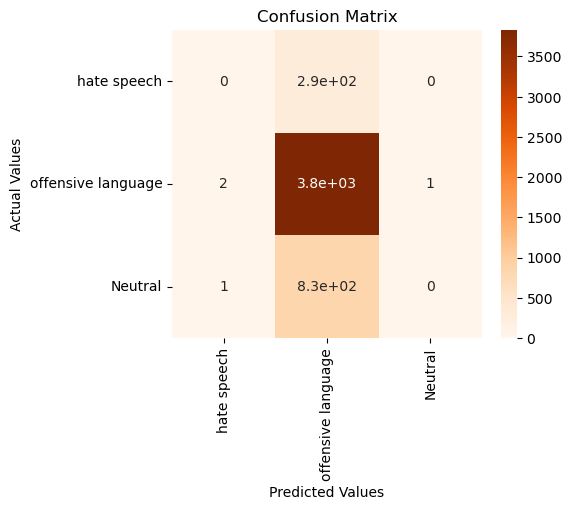

In [248]:
model_evaluate(lr_model ,X_test)

In [250]:
from sklearn.tree import DecisionTreeClassifier 

dtmodel = DecisionTreeClassifier()
dtc = dtmodel.fit(X_train,Y_train)

              precision    recall  f1-score   support

           0       0.14      0.16      0.15       290
           1       0.87      0.88      0.87      3832
           2       0.56      0.51      0.54       835

    accuracy                           0.77      4957
   macro avg       0.52      0.52      0.52      4957
weighted avg       0.78      0.77      0.77      4957



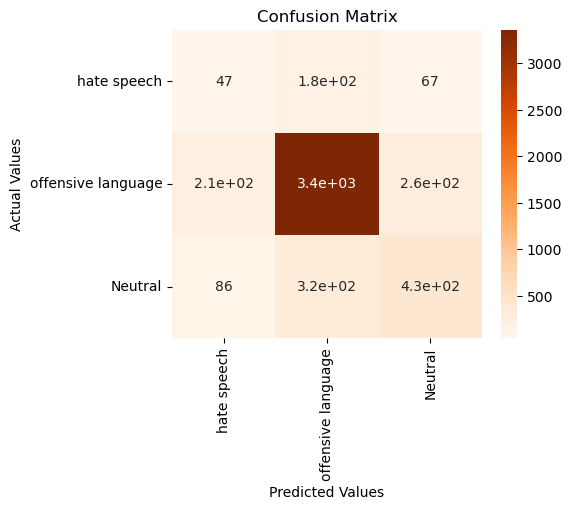

In [251]:
model_evaluate(dtc ,X_test)

In [253]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train  ,Y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.10      0.08      0.09       290
           1       0.79      0.91      0.85      3832
           2       0.39      0.15      0.21       835

    accuracy                           0.74      4957
   macro avg       0.43      0.38      0.38      4957
weighted avg       0.69      0.74      0.70      4957



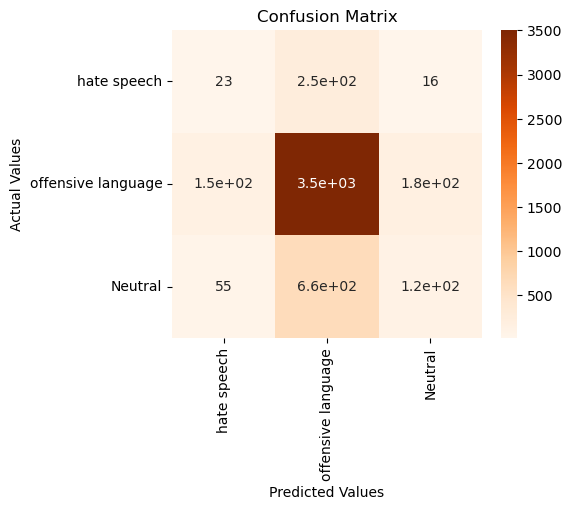

In [254]:
model_evaluate(neigh ,X_test)

In [256]:

from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(n_estimators=10)


rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

           0       0.30      0.09      0.13       290
           1       0.84      0.95      0.90      3832
           2       0.67      0.43      0.52       835

    accuracy                           0.82      4957
   macro avg       0.60      0.49      0.52      4957
weighted avg       0.78      0.82      0.79      4957



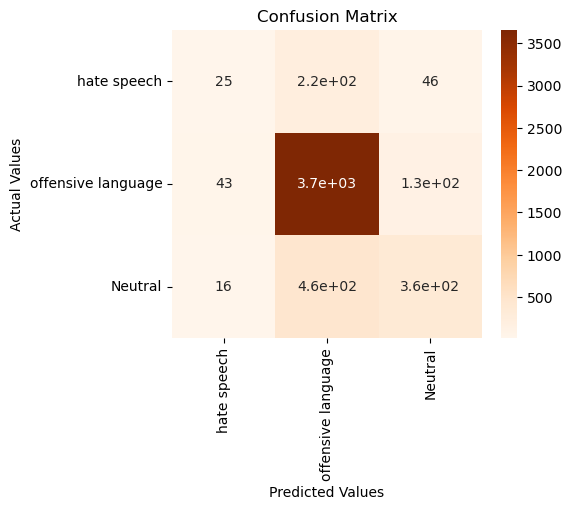

In [257]:
model_evaluate(rfc ,X_test)

In [258]:

import xgboost as xgb


xgb_model=xgb.XGBClassifier(objective="multi:softprob")

xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

              precision    recall  f1-score   support

           0       0.54      0.10      0.17       290
           1       0.88      0.95      0.91      3832
           2       0.69      0.64      0.66       835

    accuracy                           0.85      4957
   macro avg       0.70      0.56      0.58      4957
weighted avg       0.83      0.85      0.83      4957



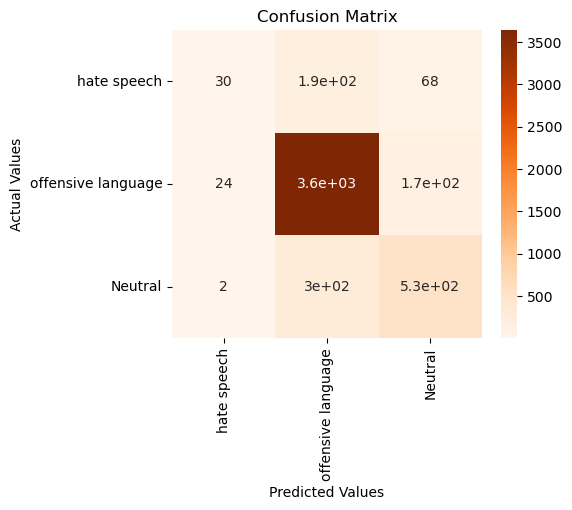

In [259]:
model_evaluate(xgb_model,X_test)

# HYPERTUNING PARAMETER

In [263]:
hyper_xgb = XGBClassifier()

params = {"n_estimators":[50,100],"max_depth":[2,3,4],"max_leaves":[2,3,4],"learning_rate":[0.1,0.001,0.01]}

xgb_grid = GridSearchCV(hyper_xgb , cv=5,param_grid=params,n_jobs=-1,verbose=2)

xgb_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.001, 0.01],
                         'max_depth': [2, 3, 4], 'max_leaves': [2, 3, 4],
                         'n_estimators': [50, 100]},
             verbose=2)

In [265]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'max_leaves': 4, 'n_estimators': 100}

In [266]:
xgb = XGBClassifier(learning_rate =  0.1, max_depth = 3, max_leaves = 4, n_estimators = 100)

              precision    recall  f1-score   support

           0       0.29      0.01      0.03       290
           1       0.80      0.99      0.88      3832
           2       0.74      0.21      0.32       835

    accuracy                           0.80      4957
   macro avg       0.61      0.40      0.41      4957
weighted avg       0.76      0.80      0.74      4957



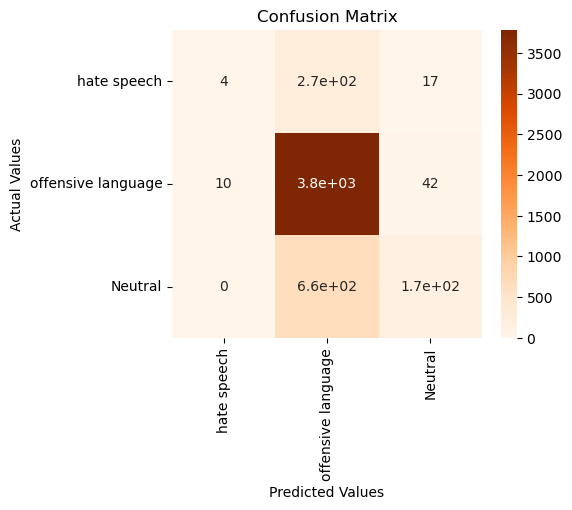

In [268]:
xgb.fit(X_train,Y_train)

model_evaluate(xgb,X_test)

* hence the xgboost classifier model predicts good comapred to other models